# Assignment 2: Due Tuesday 9/19

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

In [170]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = 0$

* $x' = v_x$

* $v_y' = -g$

* $y' = v_y$

Code the equations into a function 

In [171]:
#define projectile motion function in vaccum
v = 300
angle_deg = 50
v0 = v * np.array([np.cos(np.deg2rad(angle_deg)), np.sin(np.deg2rad(angle_deg))])
t0 = 0
tf = 50
g = 9.8
t = np.linspace(t0, tf, 1000)
def proj_vac(t, state, g):
    xt, yt, vxt, vyt = state
    dxdt = vxt
    dydt = vyt
    dvxdt = 0
    dvydt = -g  
    return [dxdt, dydt, dvxdt, dvydt]
initial_state = [0, 0, v0[0], v0[1]]

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [172]:
#code
sol = integrate.solve_ivp(proj_vac,(t0, tf),initial_state,method='RK45',t_eval=t,args=(g,))
x = sol.y[0]
y = sol.y[1]

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

<IPython.core.display.Javascript object>


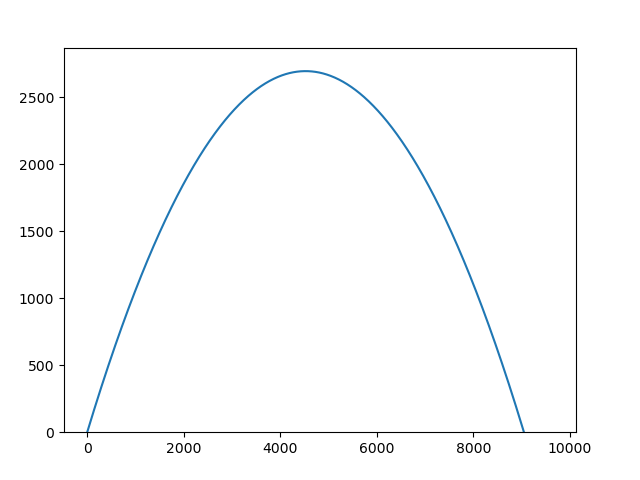

(0.0, 2867.2943426018724)

In [173]:
#codes
fig = plt.figure('no resistances')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x,y)
plt.ylim(0)

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

<IPython.core.display.Javascript object>


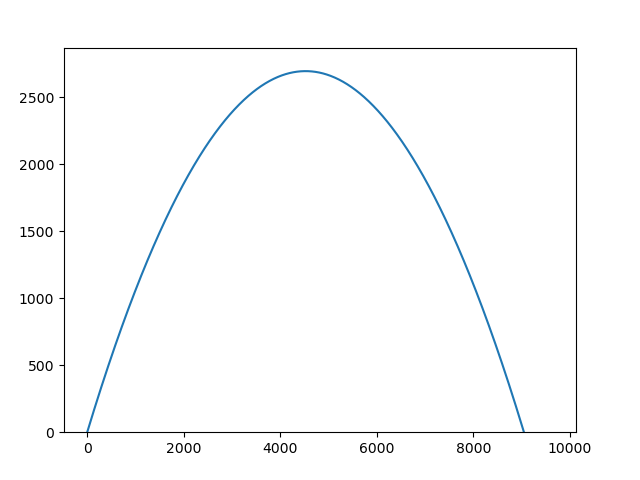

(0.0, 2867.2943426018937)

In [174]:
def rk4(f, t, x0, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        dt = t[i+1] - t[i]
        k1 = f(t[i], x[i], *args)
        k2 = f(t[i] + dt / 2., x[i] + np.array(k1) * dt / 2., *args)
        k3 = f(t[i] + dt / 2., x[i] + np.array(k2) * dt / 2., *args)
        k4 = f(t[i] + dt, x[i] + np.array(k3) * dt, *args)
        x[i+1] = x[i] + (dt / 6.) * (np.array(k1) + 2*np.array(k2) + 2*np.array(k3) + np.array(k4))
    return x

initial_state = [0, 0, v0[0], v0[1]]
sol_rk4 = rk4(proj_vac, t, initial_state, args=(g,))
fig = plt.figure('no resistances rk4')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_rk4[:, 0],sol_rk4[:, 1])
plt.ylim(0)

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

almost exactly the same

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.


Equations with no air resistance ($c = const$):

* $v_x' = -c(y)*v*v_x/m$

* $x' = v_x$

* $v_y' = -g-c(y)*v*v_y/m$

* $y' = v_y$

Code the equations into a function

In [175]:
#code
gamma = 0.25  # Ns^2/m^4
D = 0.15 / 2  # m
lam = 10000  # m
theta = 50  # deg
m = 7.8 * (4.0 / 3.0 * np.pi * D**3)
g = 9.8
v = 300
angle_deg = 50
v0 = v * np.array([np.cos(np.deg2rad(angle_deg)), np.sin(np.deg2rad(angle_deg))])
c = gamma * (D**2)
t0 = 0
tf = 35
t = np.linspace(t0, tf, 1000)

def proj_cdrag(t, state, g, c, m):
    xt, yt, vxt, vyt = state
    dxdt = vxt
    dydt = vyt
    dvxdt = -c*vxt/m
    dvydt = -g-c*vyt/m
    return [dxdt, dydt, dvxdt, dvydt]
initial_state = [0, 0, v0[0], v0[1]]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [176]:
#codes
sol_cdrag = integrate.solve_ivp(proj_cdrag,(t0, tf),initial_state, method='RK45',t_eval=t,args=(g, c, m))
x_cdrag = sol_cdrag.y[0]
y_cdrag = sol_cdrag.y[1]

Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

<IPython.core.display.Javascript object>


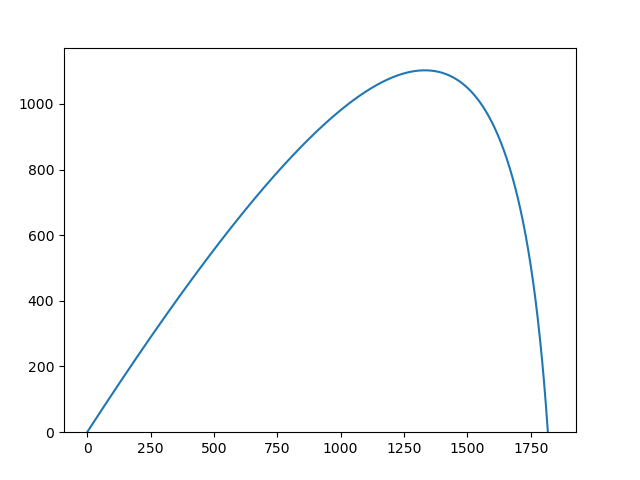

(0.0, 1170.3268348524985)

In [177]:
#codes
fig = plt.figure('constant drag rk45')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x_cdrag,y_cdrag)
plt.ylim(0)

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = -c(y)*v_x/m$

* $x' = v_x$

* $v_y' = -g-c(y)*v_y/m$

* $y' = v_y$

Code the equations into a function

In [178]:
#code
gamma = 0.25  # Ns^2/m^4
D = 0.15 / 2  # m
lam = 10000  # m
angle_deg = 50  # deg
v0 = 300  # m/s
m = 7.8 * (4.0 / 3.0 * np.pi * D**3)
g = 9.8
x0, y0 = 0, 0
vx0, vy0 = v0 * np.cos(np.deg2rad(angle_deg)), v0 * np.sin(np.deg2rad(angle_deg))
initial_state = [x0, y0, vx0, vy0]
t0 = 0
tf = 35
t = np.linspace(t0, tf, 1000)

def cy(y):
    return gamma * D**2 * np.exp(-y / lam)

def proj_realdrag(t, state, g, gamma, D, lam, m):
    x, y, vx, vy = state
    cy_value = cy(y)
    dxdt = vx
    dydt = vy
    dvxdt = -cy_value * vx / m
    dvydt = -g - cy_value * vy / m
    return [dxdt, dydt, dvxdt, dvydt]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [179]:
#codes
sol_realdrag = integrate.solve_ivp(proj_realdrag,(t0, tf),initial_state,method='RK45',t_eval=t,args=(g, gamma, D, lam, m))
x_realdrag = sol_realdrag.y[0]
y_realdrag = sol_realdrag.y[1]

Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

horizontal range:

time taken:

<IPython.core.display.Javascript object>


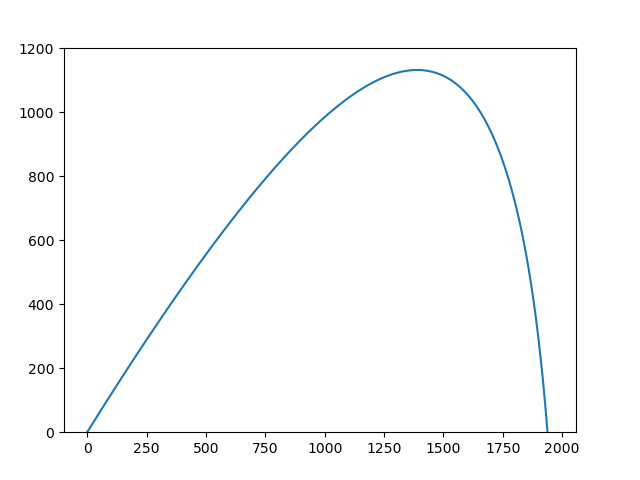

(0.0, 1201.4039476273213)

In [180]:
#codes
fig = plt.figure('varying drag rk45')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x_realdrag,y_realdrag)
plt.ylim(0)

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


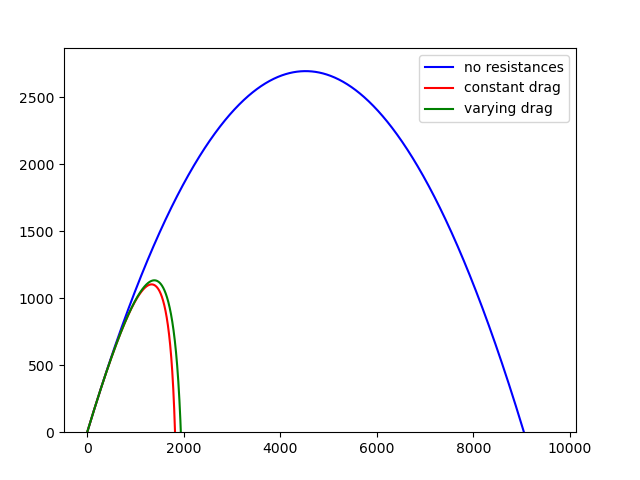

(0.0, 2867.2943426018724)

In [181]:
#codes
fig = plt.figure('all trajectories')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x,y,'b', label='no resistances')
ax.plot(x_cdrag,y_cdrag,'r', label='constant drag')
ax.plot(x_realdrag,y_realdrag,'g', label='varying drag')
ax.legend(loc='best')
plt.ylim(0)

Your results should look like the plot below.

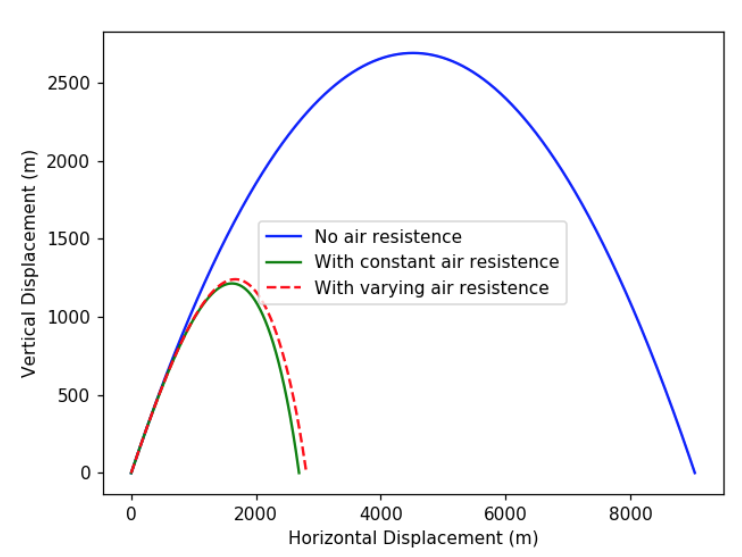

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

turning on air resistance with c(0)